# Task 2: Intensity Transformation

In [153]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [154]:
img = cv2.imread("outputBiLi.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

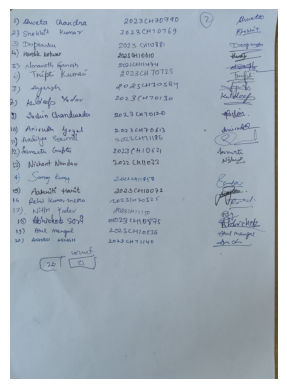

In [155]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [156]:
img.shape

(1132, 820, 3)

In [157]:
h, w, ch = img.shape
grayImg = np.zeros((h,w), dtype=np.float64)
for i in range(h):
    for j in range(w):
        grayImg[i,j] = 0.333*img[i,j][0] + 0.334*img[i,j][1] + 0.333*img[i,j][2] # Grayscale Formula

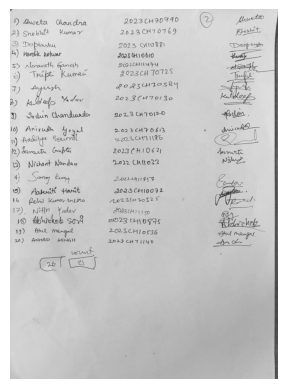

In [158]:
plt.imshow(grayImg, cmap='gray')
plt.axis('off')
plt.show()

In [159]:
cv2.imwrite('grayscale.png', grayImg)

True

# Thresholding

In [160]:
T = 143

In [161]:
contrastImg = np.zeros_like(grayImg, dtype=np.uint8)

In [162]:
for i in range(h):
    for j in range(w):
        if grayImg[i, j] < T:
            contrastImg[i, j] = 0
        else:
            contrastImg[i, j] = 255

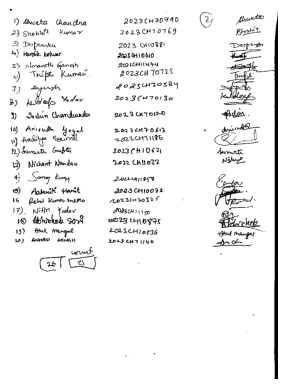

In [163]:
plt.imshow(contrastImg, cmap='gray')
plt.axis('off')
plt.show()

In [164]:
cv2.imwrite('threshold.png', contrastImg)

True

# T(r) = ar + b

In [165]:
a = 2
b = -120

In [166]:
contrastImg = a*grayImg + b

In [167]:
contrastImg = np.clip(contrastImg, 0, 255).astype(np.uint8)

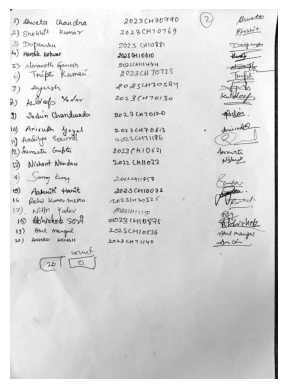

In [168]:
plt.imshow(contrastImg, cmap='gray')
plt.axis('off')
plt.show()

In [169]:
cv2.imwrite('manualLinear.png', contrastImg)

True

In [170]:
# iMin = np.min(grayImg)
# iMax = np.max(grayImg)

# Parameter selection from Image Histogram

In [171]:
hist = np.zeros(256, dtype=int)
for i in range(h):
    for j in range(w):
        hist[img[i,j]] += 1

pdf = hist/(h*w)
cdf = np.zeros_like(pdf)

sum = 0
for i in range(256):
    sum += pdf[i]
    cdf[i] = sum

In [172]:
for i in range(256):
    if cdf[i] >= 0.02:
        iMin = i
        break
for i in range(256):
    if cdf[i] >= 0.98:
        iMax = i
        break

In [173]:
a = 255/(iMax-iMin)
b = -a*iMin
print(a, b)

2.55 -155.54999999999998


In [174]:
contrastImg = np.zeros_like(grayImg, dtype=np.uint8)
for i in range(h):
    for j in range(w):
        val = a*grayImg[i, j] + b
        if val < 0:
            val = 0
        elif val > 255:
            val = 255
        contrastImg[i, j] = int(val)

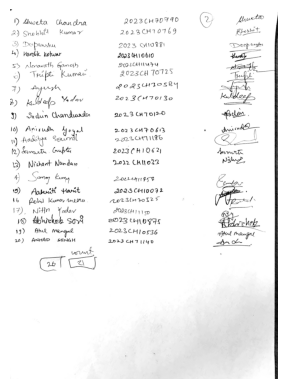

In [175]:
plt.imshow(contrastImg, cmap='gray')
plt.axis('off')
plt.show()

In [176]:
cv2.imwrite('autoLinear.png', contrastImg)

True

# Histogram Equalization

In [177]:
grayImg = np.clip(grayImg, 0, 255).astype(np.uint8)

In [178]:
grayImg.shape

(1132, 820)

In [179]:
imgArray = grayImg.flatten()

In [180]:
print(imgArray)

[114 106  87 ...  87  84  81]


In [181]:
cdf = cdf/cdf[-1]

In [182]:
minCdf = cdf[np.nonzero(cdf)][0]
print(minCdf)
map = np.zeros(256, dtype=np.uint8)
for i in range(256):
    map[i] = np.floor(255*(cdf[i]-minCdf)/(1-minCdf)).astype(np.uint8)

3.591837907538908e-07


In [183]:
contrastImg = np.zeros_like(imgArray, dtype=np.uint8)

In [184]:
for i in range(len(imgArray)):
        contrastImg[i] = map[imgArray[i]]

In [185]:
contrastImg = contrastImg.reshape(grayImg.shape)

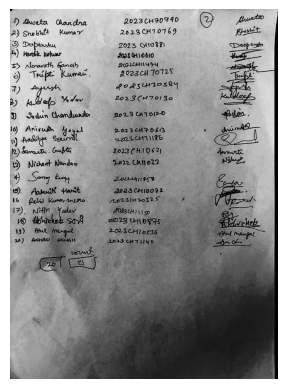

In [186]:
plt.imshow(contrastImg, cmap='gray')
plt.axis('off')
plt.show()

In [187]:
cv2.imwrite('manualHEQ.png', contrastImg)

True

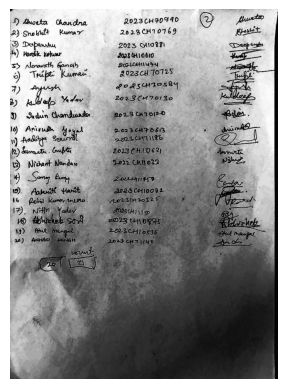

In [188]:
img = cv2.imread("outputBiLi.png", cv2.IMREAD_GRAYSCALE)

contrastImg = cv2.equalizeHist(img)

plt.imshow(contrastImg, cmap='gray')
plt.axis('off')
plt.show()

In [189]:
cv2.imwrite('opencvHEQ.png', contrastImg)

True